In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [23]:
np.random.seed(42)

In [24]:
data = []
groups = []
labels_var = []
labels_size = []

In [26]:
variability = [1, 3]
sizes = [200, 500]

In [27]:
for var in variability:
    for size in sizes:
        data.extend(np.random.normal(5,var,size))
        data.extend(np.random.normal(8,var,size))
        labels_var.extend([var]*size*2)
        labels_size.extend([size]*size*2)
        groups.extend(['group1']*size)
        groups.extend(['group2']*size)

In [28]:
data = pd.DataFrame({'data': data, 
                     'groups' : groups,
                    'variability':labels_var,
                    'size':labels_size})
print(data.head())

       data  groups  variability  size
0  5.496714  group1            1   200
1  4.861736  group1            1   200
2  5.647689  group1            1   200
3  6.523030  group1            1   200
4  4.765847  group1            1   200


In [29]:
sns.set_style('white')

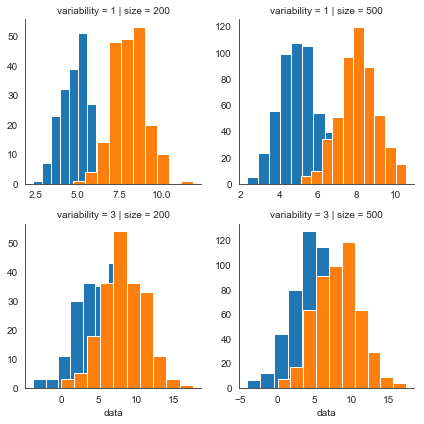

In [30]:
g = sns.FacetGrid(data, col="size", row="variability", hue='groups', sharex=False, sharey=False)
g.map(plt.hist,'data')
plt.show()

In [31]:
data_test = data.set_index(['groups','size','variability'])

In [32]:
tvalues=[]
pvalues=[]

In [33]:
for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1',size,var),level=('groups','size','variability'))
        b = data_test['data'].xs(('group2',size,var),level=('groups','size','variability'))
        tval,pval=stats.ttest_ind(b, a,equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)

In [35]:
tvalues_plot=pd.DataFrame({'t':tvalues,
                           'p':pvalues,
                          'variability':variability*2,
                          'size':np.repeat(sizes,2)})

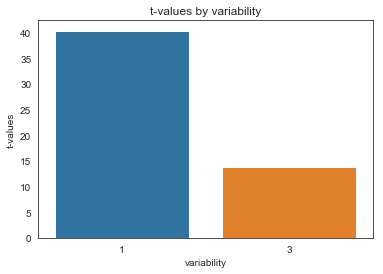

In [36]:
ax = sns.barplot(y='t',x='variability',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by variability')
plt.show()

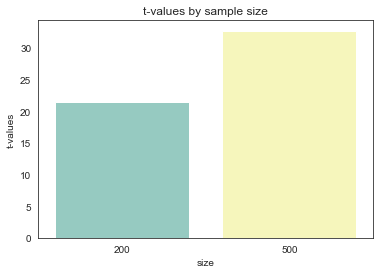

In [38]:
ax = sns.barplot(y='t',x='size',ci=None,data=tvalues_plot,palette='Set3')
ax.set(ylabel='t-values',title='t-values by sample size')
plt.show()